<a href="https://colab.research.google.com/github/dphamm17/visualization/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#1
df = pd.read_csv('/content/college_completion.csv')

In [ ]:
#2
print( df.shape, '\n')
print( df.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [ ]:
#3
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



Most institutions are private non-for-profit, 4-year colleges. Next are public two-year institutions. Finally, public 4-year and private for-profit 2-year/4-year institutions.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 



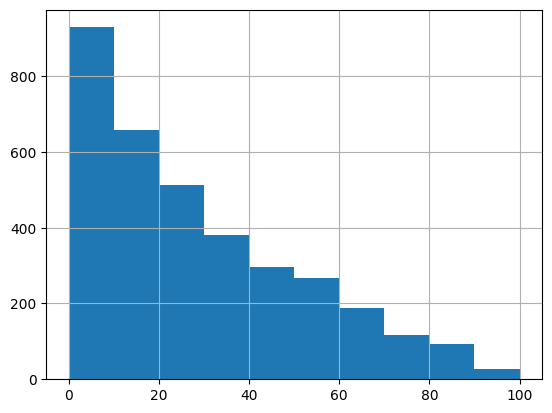

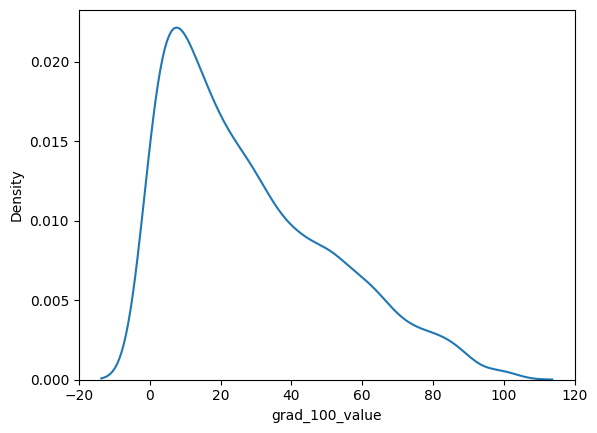

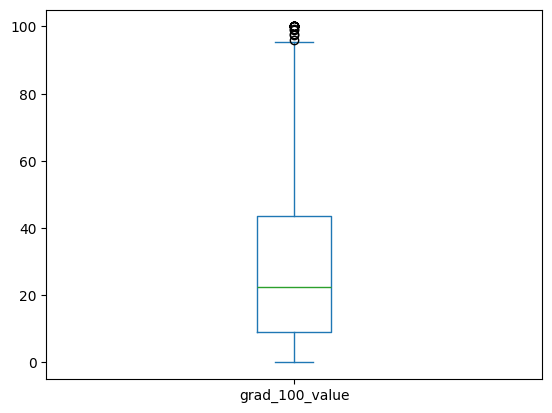

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [ ]:
#4
import seaborn as sns
print(df['grad_100_value'].describe(),'\n')
df['grad_100_value'].hist()
plt.show()

sns.kdeplot(df['grad_100_value'])
plt.show()

df['grad_100_value'].plot.box()
plt.show()

df['grad_100_value'].describe()

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

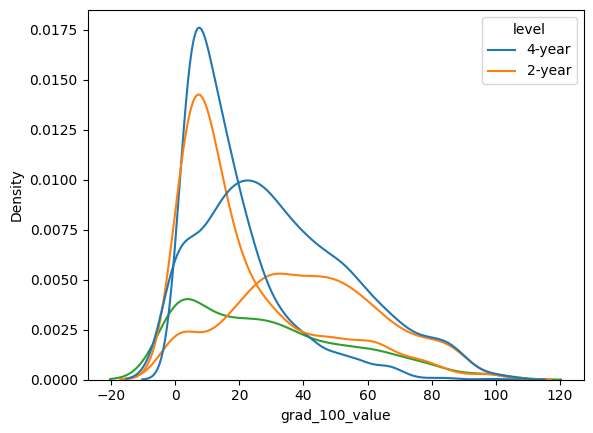

In [ ]:
#5
sns.kdeplot(data=df,x='grad_100_value',hue='control')
sns.kdeplot(data=df,x='grad_100_value',hue='level')
df.groupby(['level','control'])['grad_100_value'].describe()

4-year average graduation rates are the highest and private not-for-profit rates are the highest.

<Axes: xlabel='grad_100_value', ylabel='Density'>

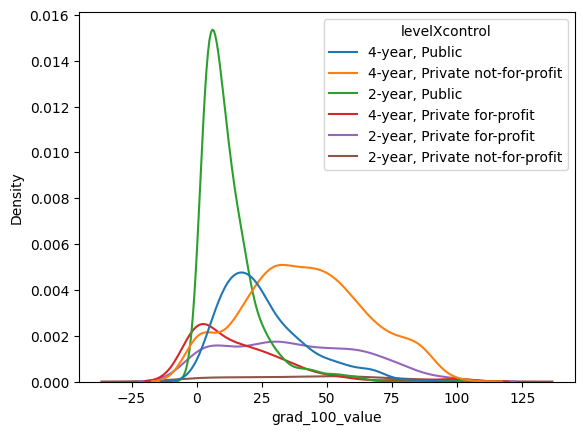

In [ ]:
#6
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')


Private for-profit 2-year schools have almost double the graduation rate of private for-profit 4-year schools. Private not-for-profit schools show little difference between 2-year and 4-year programs, while public 2-year schools have the lowest rates overall. This shows a lot of variation, with 2-year private for-profit schools performing better than expected in terms of graduation rates.

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

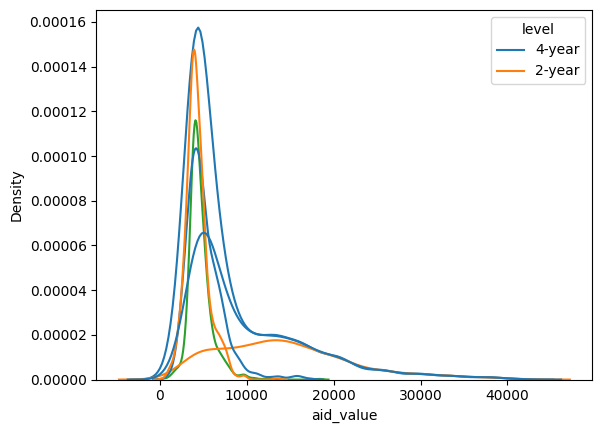

In [ ]:
#7
sns.kdeplot(data=df,x='aid_value')
sns.kdeplot(data=df,x='aid_value',hue='control')
sns.kdeplot(data=df,x='aid_value',hue='level')

df.groupby(['level','control'])['aid_value'].describe()

The second mode represents private not-for-profit institutions, with a peak around 9 for public and private for-profit schools. Private NFP schools provide significantly more aid, while public and private FP schools offer similar levels of support.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

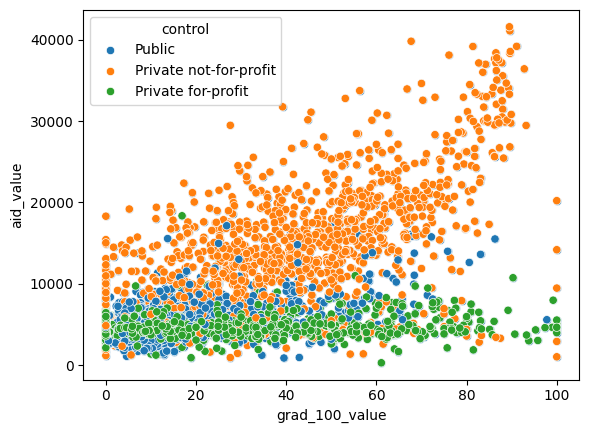

In [ ]:
#8
sns.scatterplot(data=df,x='grad_100_value',y='aid_value')
sns.scatterplot(data=df,x='grad_100_value',y='aid_value',hue='control')


There is a positive correlation between aid and graduation rates. The positive association is more tied to the 4 year, private not-for-profit institutions.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

Answer to #2: The data dictionary is thorough, offering clear definitions and explanations for each variable, including how missing data are managed. This clarity allows for more accurate data analysis and interpretation. For categorical variables, the data dictionary explicitly describes possible values for each categorical variable.
It includes special codes for missing data or unknown values, such as: 9 might represent "Unknown" for variables like GENDER or HEALTH_STATUS.
For numeric variables, the data dictionary often specifies missing value codes or placeholders, such as: -1 or 999 might indicate missing data for variables like AGE or INCOME.
In some cases, the dictionary mentions that missing values are treated as NaN (Not a Number).

In [ ]:
#3
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sfpuf2022_1_fall.csv')
df.head(), df.info()

selected_columns = ['AGE', 'GENDER', 'INCOME', 'HEALTH_STATUS']
cleaned_data = df.copy()
available_columns = df.columns.tolist()
available_columns[:50]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12477 entries, 0 to 12476
Columns: 342 entries, PUF_ID to PUFF100
dtypes: float64(127), int64(44), object(171)
memory usage: 32.6+ MB


<ipython-input-16-3b1e6b08660b>:6: DtypeWarning: Columns (43,46,49,50,51,52,53,64,68,70,73,74,76,77,81,83,84,85,86,87,88,89,90,92,96,99,100,101,105,106,107,110,112,113,116,118,119,120,123,124,125,126,127,129,136,137,138,139,140,141,143,144,149,150,151,157,158,162,166,170,171,175,186,187,188,189,190,193,195,196,198,199,200,201,202,204,205,206,212,214,215,216,217,218,219,220,222,223,224,225,226,227,228,229,231,232,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sfpuf2022_1_fall.csv')


['PUF_ID',
 'SURVEYYR',
 'VERSION',
 'ADM_H_MEDSTA',
 'ADM_H_GHPSW',
 'ADM_H_PDRS',
 'ADM_OP_MDCD',
 'ADM_DUAL_FLAG_YR',
 'ADM_FFS_FLAG_YR',
 'ADM_MA_FLAG_YR',
 'ADM_PARTD',
 'ADM_LIS_FLAG_YR',
 'ADM_PREM_AMT_YR',
 'ADM_H_HHASW',
 'ADM_H_HOSSW',
 'ADM_H_INPSW',
 'ADM_H_OUTSW',
 'ADM_H_PBSW',
 'ADM_H_SNFSW',
 'ADM_H_ACTSTY',
 'ADM_H_ACTDAY',
 'ADM_H_SNFSTY',
 'ADM_H_SNFDAY',
 'ADM_H_HHVIS',
 'ADM_H_PHYEVT',
 'INS_PRIVRX',
 'INS_PRIVLTC',
 'INS_PRIVVIS',
 'INS_PRIVDS',
 'INS_D_MADV',
 'INS_D_PRIVNUM',
 'INS_D_PRIVNUMC',
 'INS_D_PVESI',
 'INS_D_PVSELF',
 'INS_D_RDS',
 'INS_MADVRXHT',
 'INT_LANG',
 'INT_SPPROXY',
 'DEM_AGE',
 'DEM_SEX',
 'DEM_RACE',
 'DEM_RE_AGE',
 'DEM_EDU',
 'DEM_MARSTA',
 'DEM_INCOME',
 'DEM_INCSRCE',
 'DEM_ARMED',
 'DEM_CBSA',
 'DEM_IPR_IND',
 'ACC_HCTROUBL']

In [ ]:
#3
# Renaming columns for clarity
selected_columns = {
    'DEM_AGE': 'AGE',
    'DEM_SEX': 'GENDER',
    'DEM_INCOME': 'INCOME',
    'DEM_MARSTA': 'HEALTH_STATUS'
}

cleaned_data = df[list(selected_columns.keys())].rename(columns=selected_columns)

# Handling missing and invalid values
cleaned_data['AGE'].replace({999: None}, inplace=True)
cleaned_data['INCOME'].replace({-1: None}, inplace=True)
cleaned_data['GENDER'].replace({9: 'Unknown'}, inplace=True)
cleaned_data['HEALTH_STATUS'].replace({9: 'Unknown'}, inplace=True)

# Convert categorical data to 'category' dtype
cleaned_data['GENDER'] = cleaned_data['GENDER'].astype('category')
cleaned_data['HEALTH_STATUS'] = cleaned_data['HEALTH_STATUS'].astype('category')

# Display a summary of the cleaned data
cleaned_data.info(), cleaned_data.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12477 entries, 0 to 12476
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE            12477 non-null  int64   
 1   GENDER         12477 non-null  category
 2   INCOME         12477 non-null  int64   
 3   HEALTH_STATUS  12477 non-null  category
dtypes: category(2), int64(2)
memory usage: 219.9 KB


<ipython-input-17-25d9299f8801>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['AGE'].replace({999: None}, inplace=True)
<ipython-input-17-25d9299f8801>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

(None,
    AGE GENDER  INCOME HEALTH_STATUS
 0    1      1       1             4
 1    2      1       2             1
 2    3      2       1             2
 3    3      1       1             3
 4    2      1       1             3)

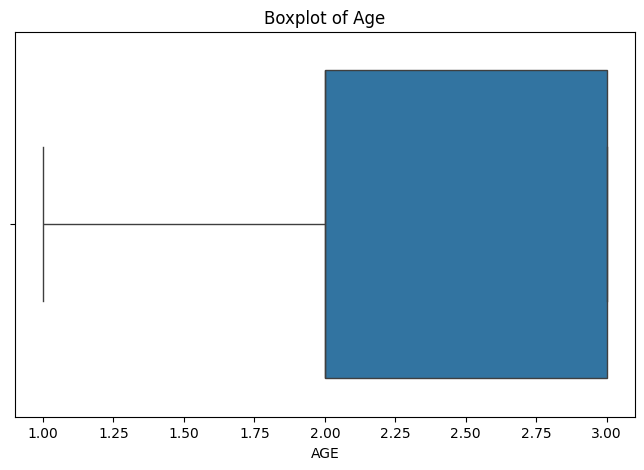

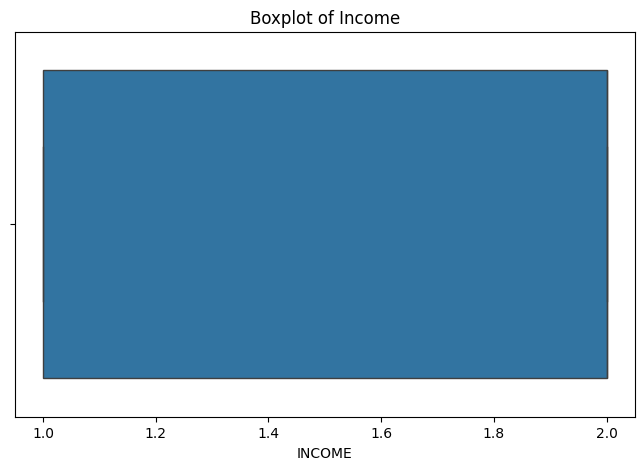

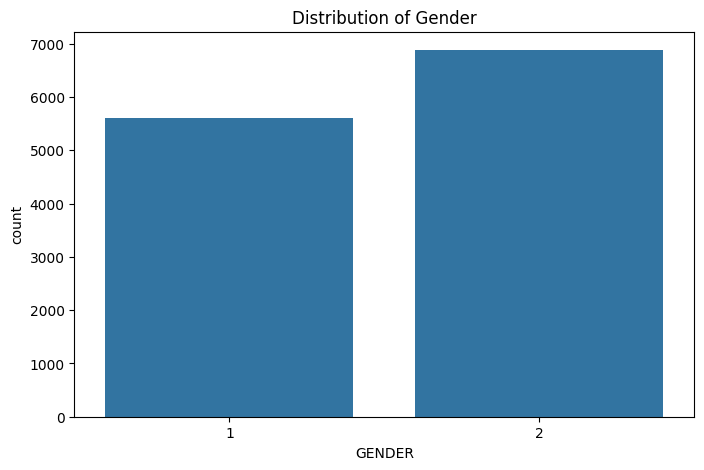

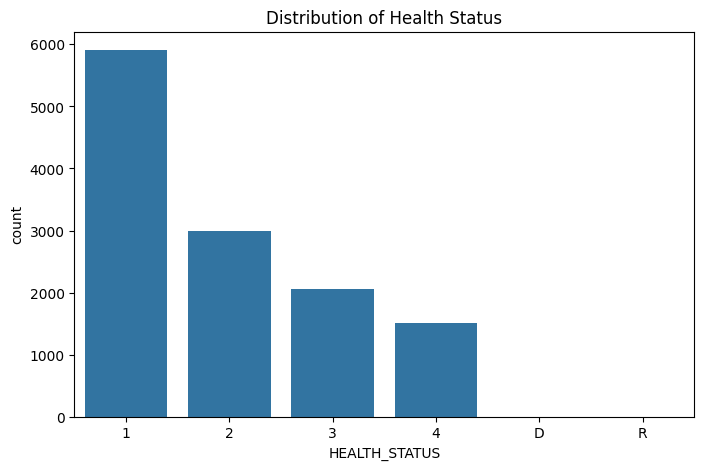

In [ ]:
#4/5/6 (plots)
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numeric variables
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE', data=cleaned_data)
plt.title('Boxplot of Age')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='INCOME', data=cleaned_data)
plt.title('Boxplot of Income')
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', data=cleaned_data)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='HEALTH_STATUS', data=cleaned_data)
plt.title('Distribution of Health Status')
plt.show()

In [ ]:
#7
numeric_summary = cleaned_data[['AGE', 'INCOME']].describe()

crosstab_result = pd.crosstab(cleaned_data['GENDER'], cleaned_data['HEALTH_STATUS'])

print("\nCross-tabulation of Gender and Health Status:")
print(crosstab_result)


Cross-tabulation of Gender and Health Status:
HEALTH_STATUS     1     2    3    4     1     2    3    4  D  R
GENDER                                                         
1              1691   351  420  413  1620   324  395  384  0  0
2              1299  1160  610  389  1298  1154  640  325  2  2


Age and Income show grouped or binned values, with minimal variance beyond their discrete ranges. The gender distribution is consistent across health status categories, but categories 1 and 2 of HEALTH_STATUS are more prevalent.